## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read data

In [2]:
df = pd.read_csv('task1.csv')
imp_dict = {
    's': 'sequential',
    'c': 'critical',
    'a': 'atomic',
    'l': 'lock',
    'r': 'reduction'
}
df['implementation'] = df['implementation'].map(imp_dict)
df

,implementation,N_points,N_threads,A,B,time
0,sequential,100000,1,0.00001,0.0001,0.010111
1,sequential,100000,1,0.00010,0.0010,0.008172
2,sequential,100000,1,0.00100,0.0100,0.007871
3,sequential,100000,1,0.01000,0.1000,0.007656
4,sequential,100000,1,0.10000,1.0000,0.007943
...,...,...,...,...,...,...
2395,reduction,10000000,20,0.01000,0.1000,0.082410
2396,reduction,10000000,20,0.10000,1.0000,0.081280
2397,reduction,10000000,20,1.00000,10.0000,0.067269
2398,reduction,10000000,20,10.00000,100.0000,0.065625


## Scheme of analysis

* influence of A and B (for sequential + num_threads = 1 as basis) - heatmap
* influence of n_threads (selected A and B) - linear plot
* influence of n_points (selected A and B) - linear plot

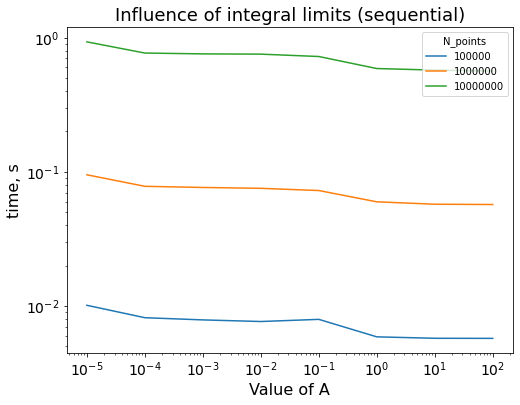

In [3]:
df_ = df[(df['implementation'] == 'sequential') & (df['N_threads'] == 1)]

fig, ax = plt.subplots(figsize=(8,6))
df_.pivot_table(index=['A'], columns='N_points', values='time').plot(ax=ax)
plt.xscale('log')
plt.yscale('log')
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('Value of A', size=16)
plt.ylabel('time, s', size=16)
plt.title('Influence of integral limits (sequential)', size=18);

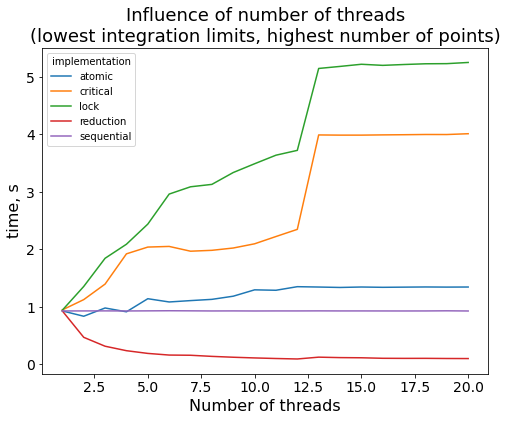

In [4]:
df_ = df[(df['A'] == 0.00001) & (df['N_points'] == 10000000)]

fig, ax = plt.subplots(figsize=(8,6))
df_.pivot_table(index=['N_threads'], columns='implementation', values='time').plot(ax=ax)
# plt.xscale('log')
# plt.yscale('log')
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('Number of threads', size=16)
plt.ylabel('time, s', size=16)
plt.title('Influence of number of threads\n(lowest integration limits, highest number of points)', size=18);

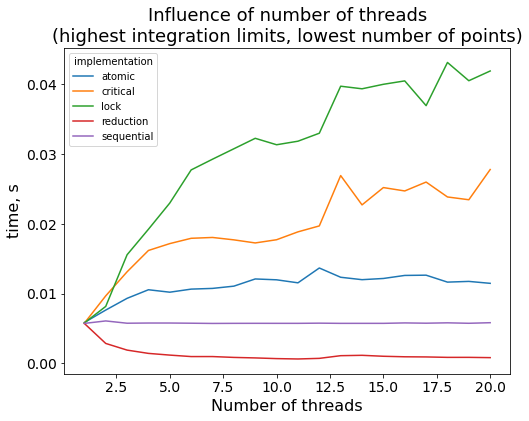

In [5]:
df_ = df[(df['A'] == 100) & (df['N_points'] == 100000)]

fig, ax = plt.subplots(figsize=(8,6))
df_.pivot_table(index=['N_threads'], columns='implementation', values='time').plot(ax=ax)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('Number of threads', size=16)
plt.ylabel('time, s', size=16)
plt.title('Influence of number of threads\n(highest integration limits, lowest number of points)', size=18);